In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
A = jnp.array([[3,-1,-1],[-1,3,-1],[-1,-1,2]])
x = jnp.array([0.,0.,1.])

In [2]:
def f(x):
    return x@A@x

def nabla_f(x):
    # gradient of obj function in euclid sp.
    return jax.grad(f)(x)

def grad_f(x):
    # orthogonal projection to tangent vector (gradient on riemann manifold)
    a = nabla_f(x)
    return a - (a@x)*x

def retraction(x):
    return x / jnp.linalg.norm(x)

In [3]:
x_ans = jnp.array([1/2, 1/2, 1/jnp.sqrt(2)])
opt_val = f(x_ans) 

In [4]:
max_iter = 1000
alpha = 1e-3 # step size
sol_norm = []
val_norm = []
grad_norm = []

for t in range(max_iter):
    d = -grad_f(x)    
    x = retraction(x + alpha*d)

    sol_norm.append(jnp.linalg.norm(x - x_ans))
    val_norm.append(f(x) - opt_val)
    grad_norm.append(jnp.linalg.norm(d))

Text(0.5, 1.0, '$\\|grad f(x)\\|$')

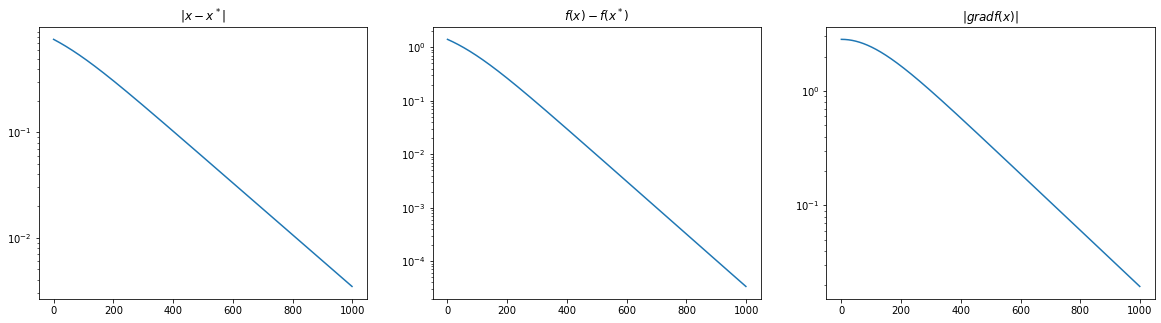

In [5]:
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.plot(sol_norm)
ax2.plot(val_norm)
ax3.plot(grad_norm)
ax1.set_title('$\|x - x^* \|$')
ax2.set_title('$f(x) - f(x^*)$')
ax3.set_title('$\|grad f(x)\|$')